# 신경망 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## 다차원 배열 계산

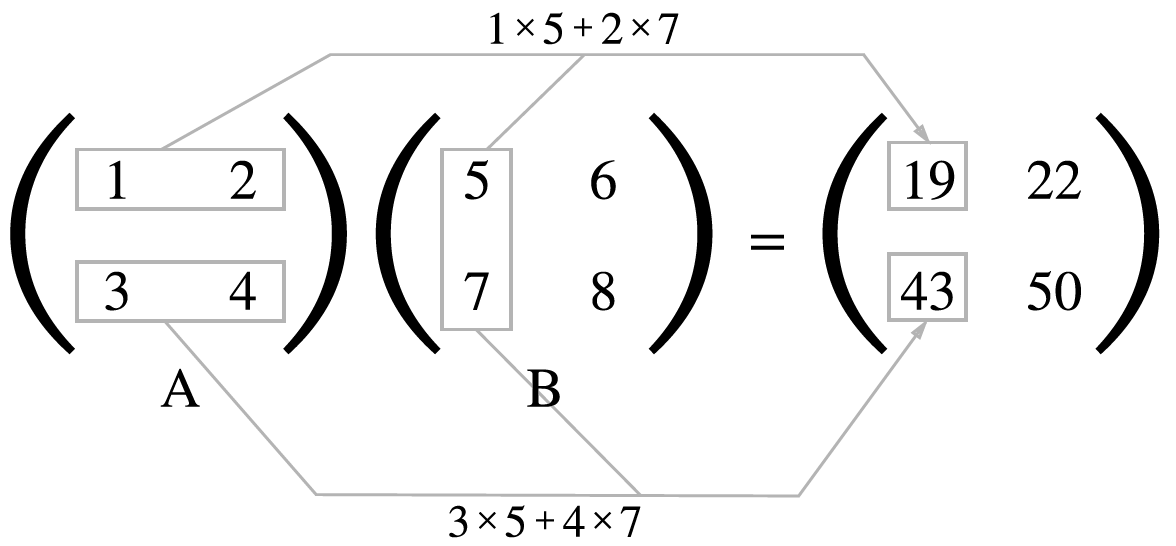

In [17]:
from IPython.display import Image
Image('./deep_learning_images/fig 3-11.png', width=400)

In [3]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = np.dot(A, B)
result

array([[19, 22],
       [43, 50]])

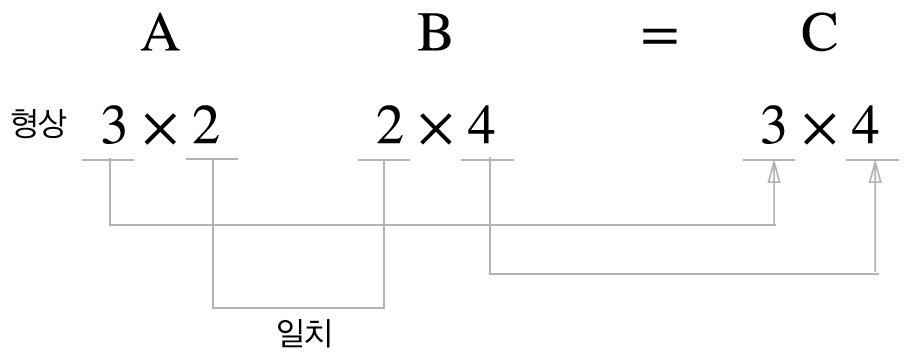

In [19]:
Image('./deep_learning_images/fig 3-12.png', width=400)

In [10]:
A = np.array([[3, 2], [2, 1], [3, 3]])
B = np.array([[2, 4, 1, 1], [2, 3, 1, 6]])

C = np.dot(A, B)
C

array([[10, 18,  5, 15],
       [ 6, 11,  3,  8],
       [12, 21,  6, 21]])

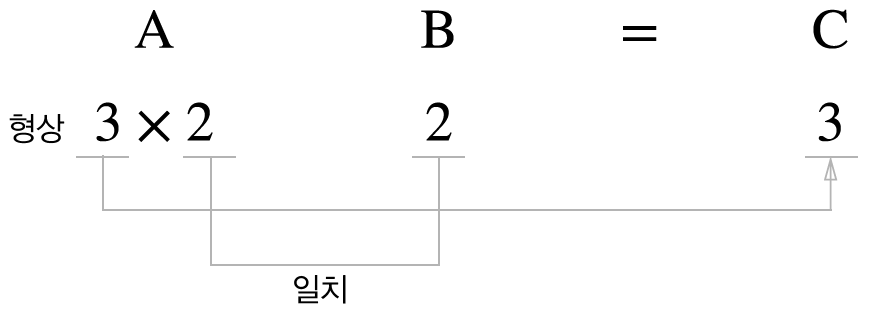

In [21]:
Image('./deep_learning_images/fig 3-13.png', width=400)

In [13]:
A = np.array([[2, 4], [1, 2], [3, 3]])
B = np.array([3, 2])

C = np.dot(A, B)
C

array([14,  7, 15])

## 신경망에서의 행렬곱

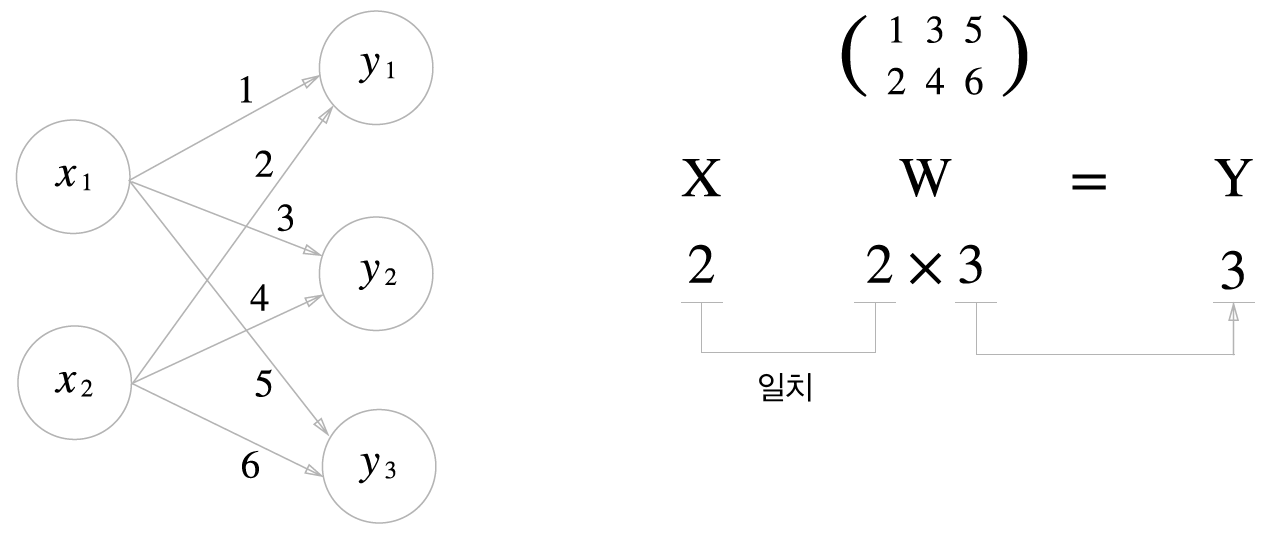

In [23]:
Image('./deep_learning_images/fig 3-14.png', width=400)

In [14]:
A = np.array([3, 2])
B = np.array([[2, 4, 2], [1, 2, 3]])

C = np.dot(A, B)
C

array([ 8, 16, 12])

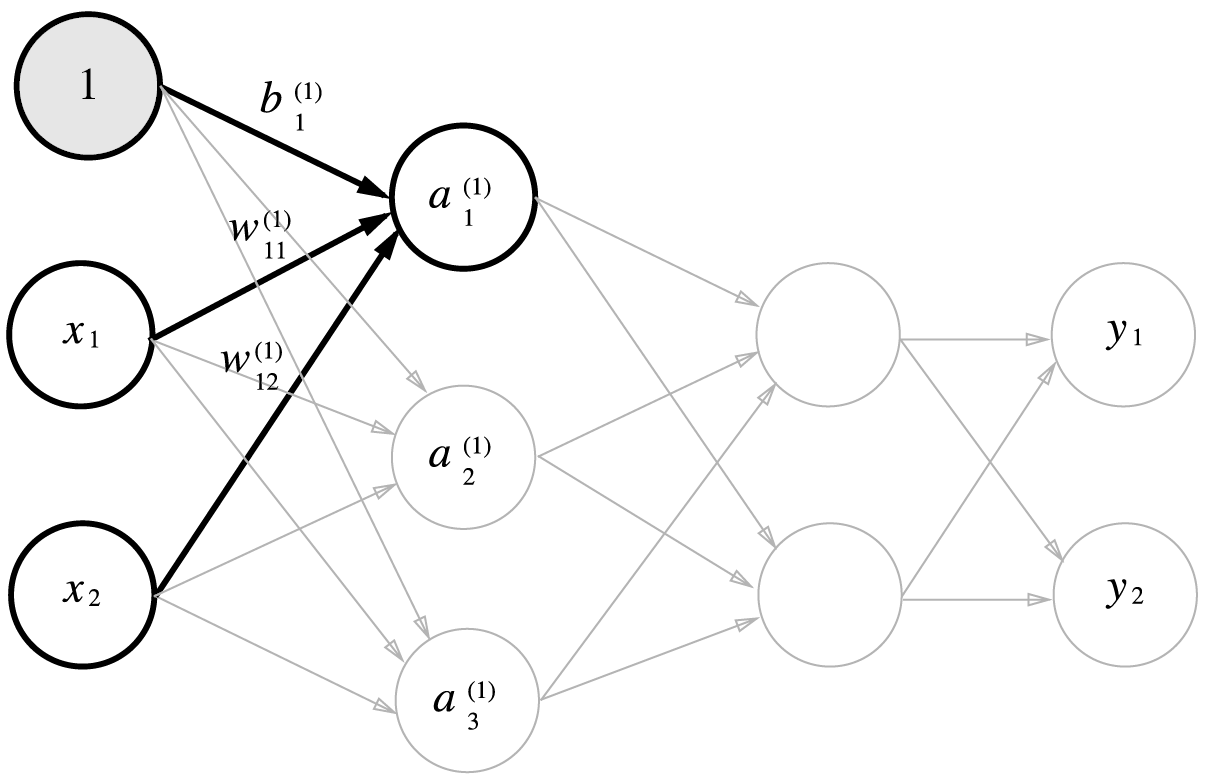

In [25]:
Image('./deep_learning_images/fig 3-17.png', width=400)

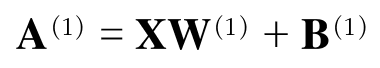

In [26]:
Image('./deep_learning_images/e 3.9.png', width=400)

In [51]:
X = np.array([[1.0, 0.3]])  # (2, )
W1 = np.array([[0.3, 0.3, 0.2], [0.2, 0.5, 0.3]]) # (2, 3)
B1 = np.array([[0.1, 0.2, 0.3]])  # (3, )

A1 = np.dot(X, W1) + B1

print(X.shape, W1.shape, B1.shape, A1.shape, A1)

(1, 2) (2, 3) (1, 3) (1, 3) [[0.46 0.65 0.59]]


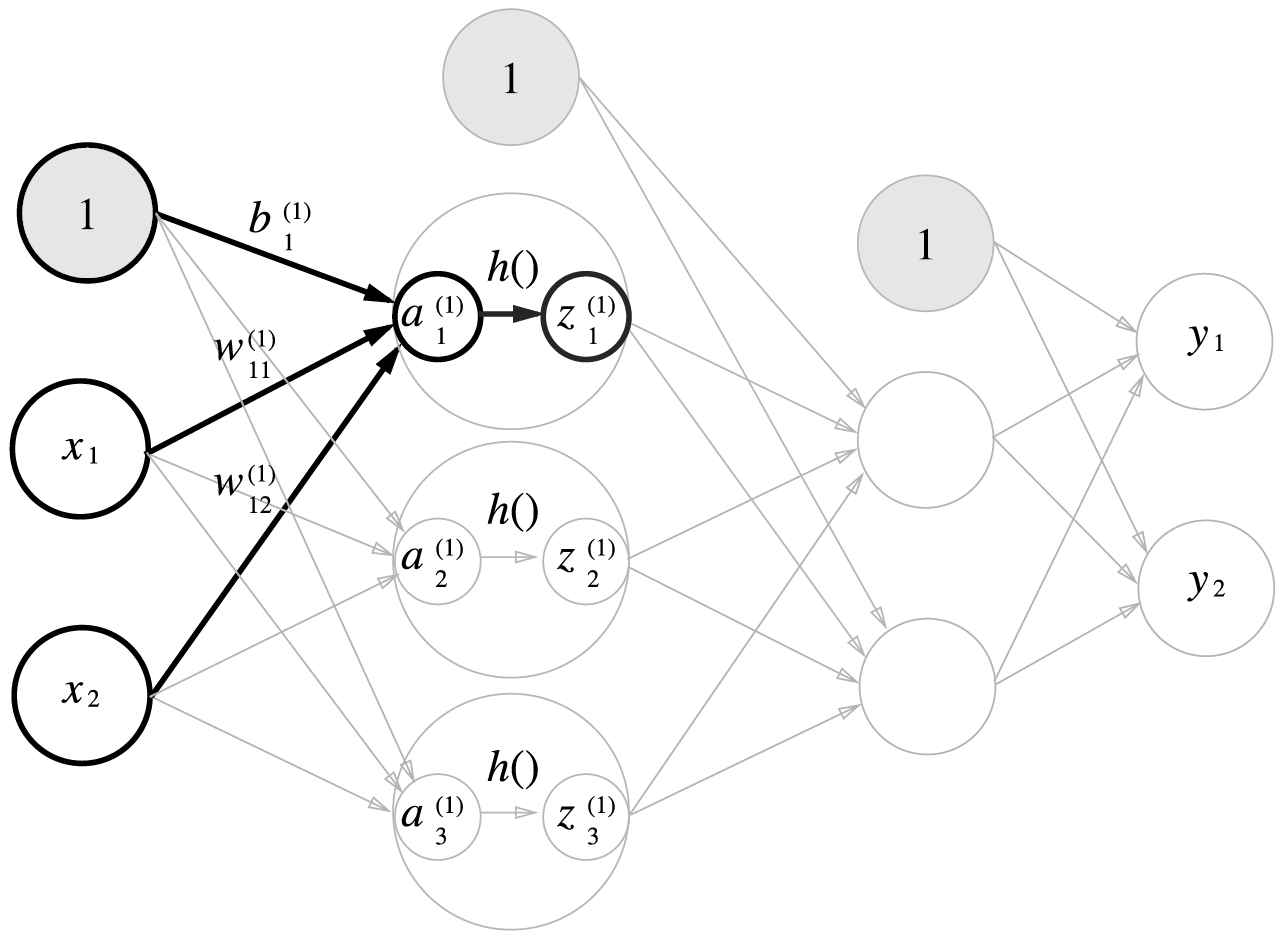

In [32]:
Image('./deep_learning_images/fig 3-18.png', width=400)

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [39]:
Z1 = sigmoid(A1)
Z1

array([[0.61301418, 0.65701046, 0.64336515]])

In [41]:
Z1.shape

(1, 3)

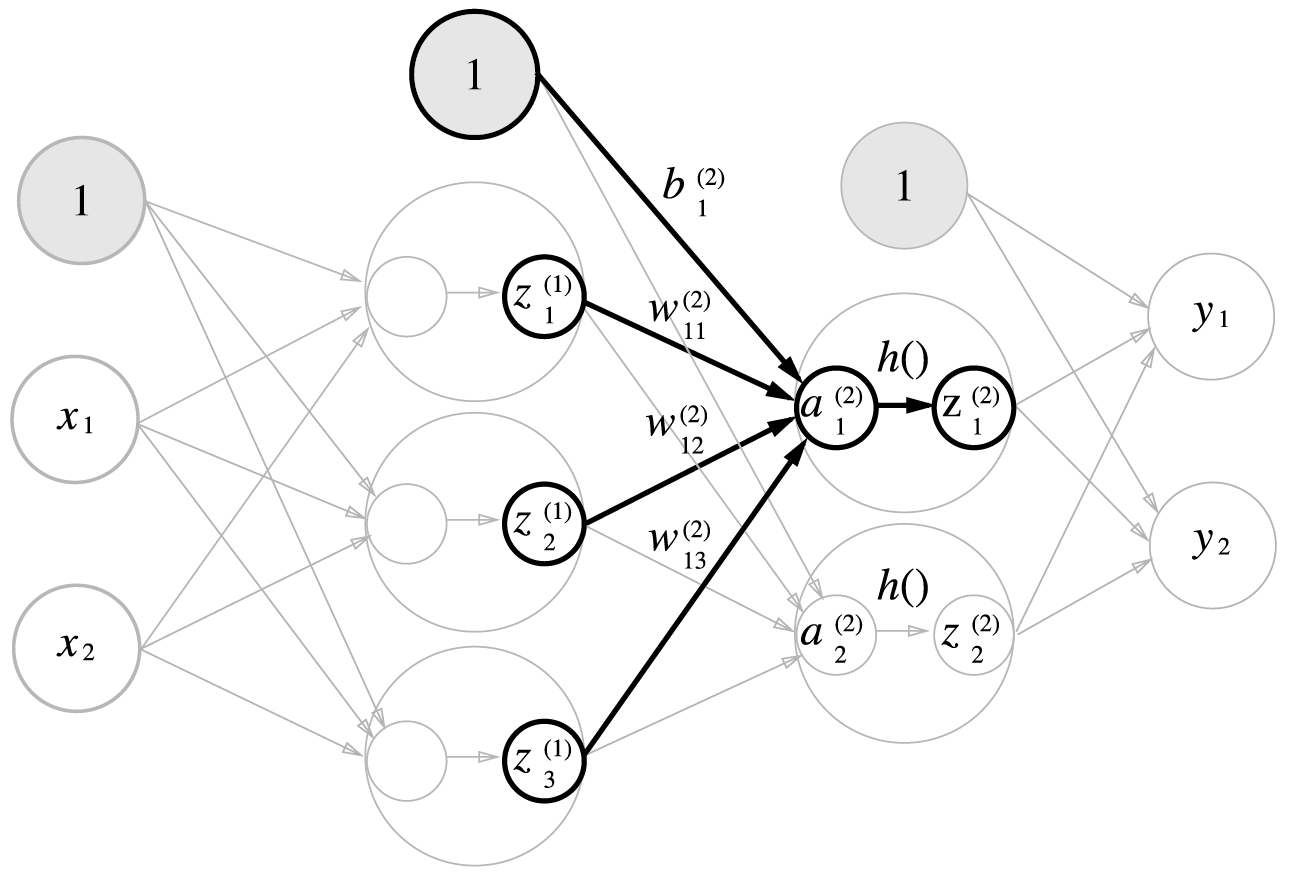

In [30]:
Image('./deep_learning_images/fig 3-19.png', width=400)

In [52]:
W2 = np.array([[0.7, 0.3], [0.1, 0.2], [0.4, 0.2]])
B2 = np.array([0.1, 0.3])


A2 = np.dot(Z1, W2) + B2

Z2 = sigmoid(A2)

print(W2.shape, B2.shape, A2.shape, Z2.shape, Z2)

(3, 2) (2,) (1, 2) (1, 2) [[0.70101943 0.67786542]]


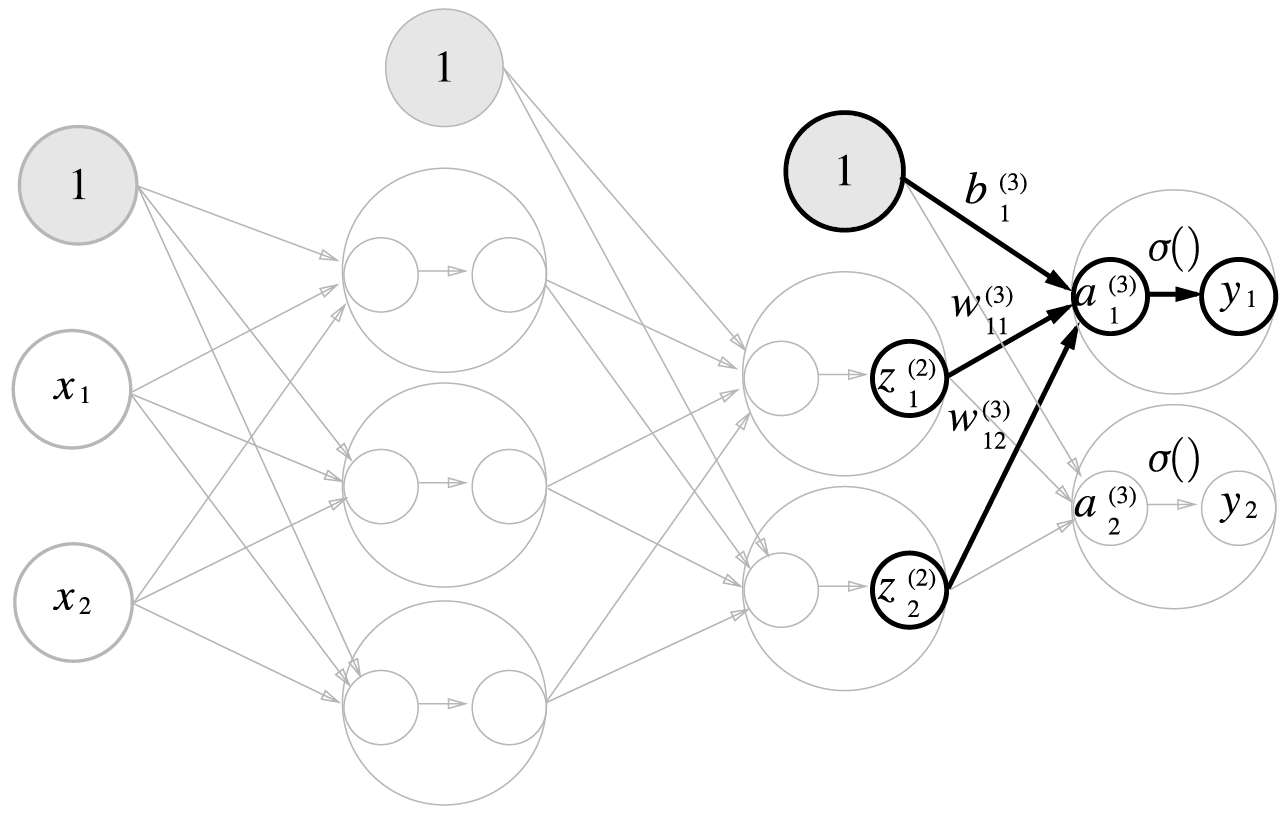

In [32]:
Image('./deep_learning_images/fig 3-20.png', width=400)

In [45]:
def identity_function(x):
    return x

In [53]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # (2, 2)
B3 = np.array([0.1, 0.2])  # (2, )

A3 = np.dot(Z2, W3) + B3

Y = identity_function(A3)

print(W3.shape, B3.shape, A3.shape, Y.shape, Y)

(2, 2) (2,) (1, 2) (1, 2) [[0.30567503 0.681452  ]]


## 출력층(Softmax 함수)

In [54]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3층 신경망 구현

In [55]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.3, 0.3, 0.2], [0.2, 0.5, 0.3]]) # (2, 3)
    network['B1'] = np.array([[0.1, 0.2, 0.3]])  # (3, )

    network['W2'] = np.array([[0.7, 0.3], [0.1, 0.2], [0.4, 0.2]])
    network['B2'] = np.array([0.1, 0.3])

    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # (2, 2)
    network['B3'] = np.array([0.1, 0.2])  # (2, )
    
    return network

def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    
    return Y

In [57]:
network = init_network()
X = np.array([1.0, 0.5]) # (2, )

Y = forward(network, X)
Y

array([[0.30640938, 0.68321928]])

## 손글씨 숫자(MNIST)

In [64]:
from dataset.mnist import load_mnist

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return X_test, y_test

X_test, y_test = get_data()

print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


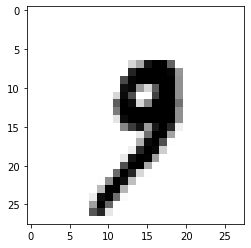

In [66]:
plt.imshow(X_test[1000].reshape(28, 28), cmap='binary')

In [78]:
import pickle

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [82]:
network = init_network()
print(type(network), network.keys())

<class 'dict'> dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])


In [72]:
network['W1'].shape, network['W2'].shape, network['W3'].shape

((784, 50), (50, 100), (100, 10))

In [74]:
network['b1'].shape, network['b2'].shape, network['b3'].shape

((50,), (100,), (10,))

- 입력 이미지 한장이 신경망을 통과하는 과정(전방향 연산, 예측)

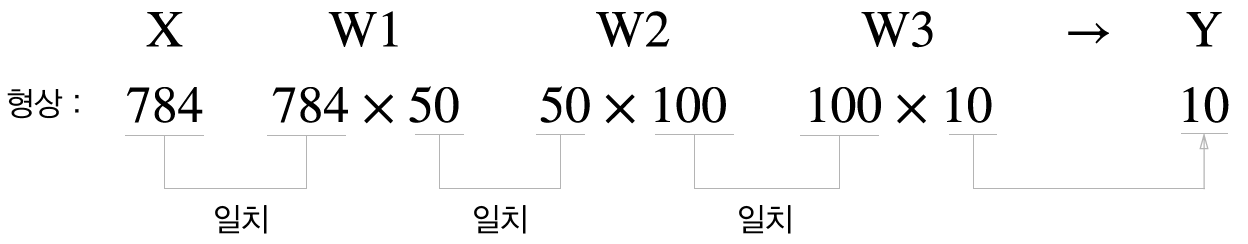

In [73]:
Image('./deep_learning_images/fig 3-26.png', width=400)

In [81]:
def predict(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    
    A1 = np.dot(X, W1) + B1  # (50, )
    Z1 = sigmoid(A1)         # (50, )
    A2 = np.dot(Z1, W2) + B2 # (100, )
    Z2 = sigmoid(A2)         # (100, )
    A3 = np.dot(Z2, W3) + B3 # (10, )
    Y = softmax(A3)          # (10, )
    
    return Y

In [87]:
X_test[1000].shape

(784,)

In [86]:
y = predict(network, X_test[1000])
y

array([5.0377946e-07, 5.8335485e-04, 1.8732329e-05, 1.6465841e-02,
       4.6309014e-03, 3.3431701e-04, 1.1879358e-06, 7.5529285e-02,
       5.5383303e-04, 9.0188205e-01], dtype=float32)

In [92]:
correct_cnt = 0
for i, test_img in enumerate(X_test):  # 10000 iterations
    prob = predict(network, test_img)
    pred = np.argmax(prob)
    if pred == y_test[i]:
        correct_cnt += 1
        
Accuracy = correct_cnt / len(y_test)        
print('Accuracy:', Accuracy)

Accuracy: 0.9352


- image 배치 입력에 대한 신경망 예측 과정

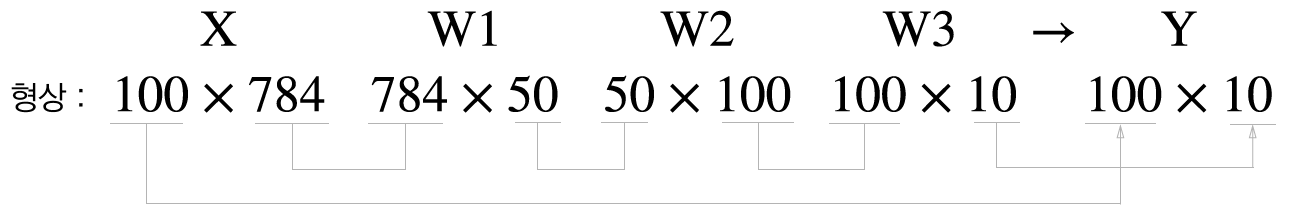

In [51]:
Image('./deep_learning_images/fig 3-27.png', width=400)

In [93]:
batch_size = 100
correct_cnt = 0

for i in range(0, len(X_test), batch_size):  # 10000 iterations
    test_img_batch = X_test[i:i + batch_size] # 100개씩 슬라이싱 (0 ~ 99, 100 ~ 199, ...)   
    prob_batch = predict(network, test_img_batch)
    pred_batch = np.argmax(prob_batch, axis = 1)
    correct_cnt += np.sum(pred_batch == y_test[i:i + batch_size])
        
Accuracy = correct_cnt / len(y_test)        
print('Accuracy:', Accuracy)

Accuracy: 0.9352
